In [111]:
!pip install seaborn

In [112]:
!pip install tensorflow

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [114]:
data = pd.read_csv("Data/train.csv")

In [115]:
#Let's start with some descriptive data anaylysis
data.head(10)

PassengerId HomePlanet CryoSleep  Cabin    Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P    TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S    TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S    TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S    TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S    TRAPPIST-1e  16.0  False   
5     0005_01      Earth     False  F/0/P  PSO J318.5-22  44.0  False   
6     0006_01      Earth     False  F/2/S    TRAPPIST-1e  26.0  False   
7     0006_02      Earth      True  G/0/S    TRAPPIST-1e  28.0  False   
8     0007_01      Earth     False  F/3/S    TRAPPIST-1e  35.0  False   
9     0008_01     Europa      True  B/1/P    55 Cancri e  14.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck                Name  \
0          0.0        0.0           0.0     0.0     0.0     Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0        Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0       Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0        Solam Susent   
4        303.0       70.0         151.0   565.0     2.0   Willy Santantines   
5          0.0      483.0           0.0   291.0     0.0   Sandie Hinetthews   
6         42.0     1539.0           3.0     0.0     0.0  Billex Jacostaffey   
7          0.0        0.0           0.0     0.0     NaN  Candra Jacostaffey   
8          0.0      785.0          17.0   216.0     0.0       Andona Beston   
9          0.0        0.0           0.0     0.0     0.0      Erraiam Flatic   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  
5         True  
6         True  
7         True  
8         True  
9         True

In [116]:
data.shape

(8693, 14)

In [117]:
#Let us try to indenify the trends in non-categorical data first
data.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


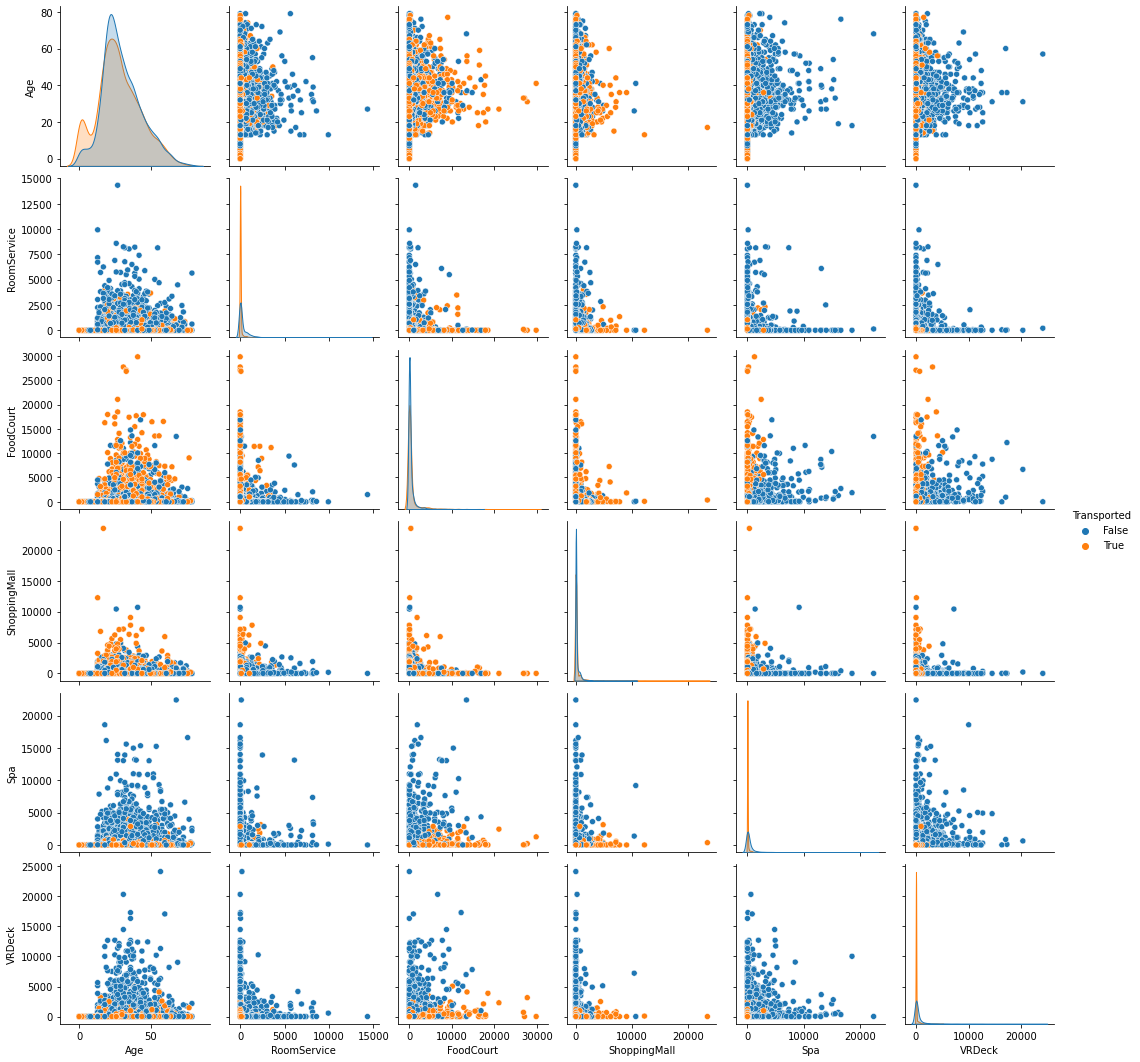

In [119]:
non_cat = data.select_dtypes(exclude=['object'])
sns.pairplot(non_cat, hue="Transported")

([<matplotlib.patches.Wedge at 0x7f356554dc70>,
 [Text(-0.14445288072599838, 1.0904739177302503, 'Earth'),
  Text(-0.5456478714190157, -0.955127426271436, 'Europia'),
  Text(0.8752009735838737, -0.6663507003356715, 'Mars')])

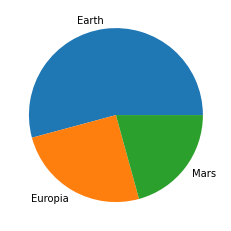

In [120]:
categorical = data.select_dtypes(include=['object','bool'])
plt.pie(categorical['HomePlanet'].value_counts(), labels=['Earth', 'Europia', 'Mars'])

([<matplotlib.patches.Wedge at 0x7f356551b340>,
 [Text(-0.47364804717575937, 0.9928028643223135, 'False'),
  Text(0.4736480471757592, -0.9928028643223135, 'True')])

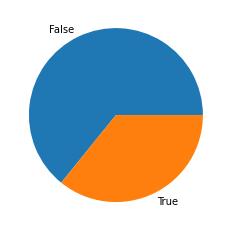

In [121]:
plt.pie(categorical['CryoSleep'].value_counts(), labels=['False','True'])

([<matplotlib.patches.Wedge at 0x7f35654de820>,
 [Text(-0.6324575589537547, 0.8999985756223496, 'TRAPPIST-1e'),
  Text(0.34470342064144743, -1.0445954010037022, '55 Cancri e'),
  Text(1.0528587716222633, -0.3185724517563615, 'PSO J318.5-22')])

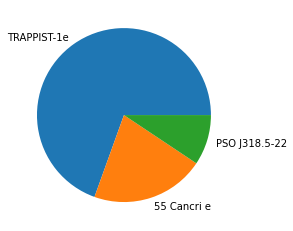

In [122]:
plt.pie(categorical['Destination'].value_counts(), labels=['TRAPPIST-1e','55 Cancri e','PSO J318.5-22'])

([<matplotlib.patches.Wedge at 0x7f35654a1b20>,
 [Text(-1.0970190325929705, 0.08092738800173493, 'False'),
  Text(1.097019030698728, -0.08092741367931887, 'True')])

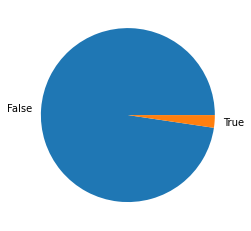

In [123]:
plt.pie(categorical['VIP'].value_counts(), labels=['False','True'])

<AxesSubplot:>

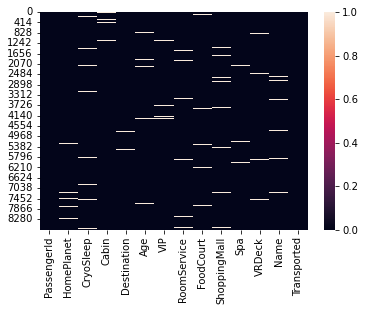

In [124]:
sns.heatmap(data.isnull())

In [125]:
#All columns have missing values :(
missing_dropped = data.dropna()
missing_dropped.shape

(6606, 14)

In [126]:
#Dropping causes huge loss of data, let's try to fill in the missing data

#Since the homeplanet of majority is Earth we replace nan values with earth similarily for other object columns
data = data.fillna({'HomePlanet':'Earth', 'CryoSleep':False, 'Destination':'TRAPPIST-1e', 'VIP':False})

<AxesSubplot:>

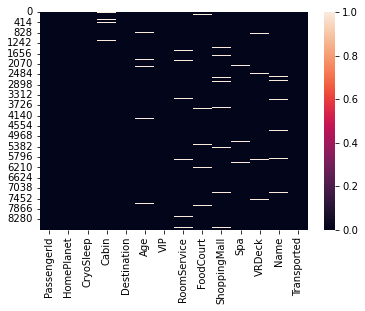

In [127]:
sns.heatmap(data.isnull())

In [128]:
data = data.drop(['PassengerId','Cabin','Name'], axis=1)

<AxesSubplot:>

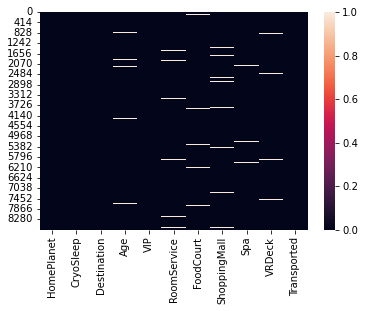

In [129]:
sns.heatmap(data.isnull())

In [130]:
data.head(10)

HomePlanet  CryoSleep    Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa      False    TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth      False    TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa      False    TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa      False    TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth      False    TRAPPIST-1e  16.0  False        303.0       70.0   
5      Earth      False  PSO J318.5-22  44.0  False          0.0      483.0   
6      Earth      False    TRAPPIST-1e  26.0  False         42.0     1539.0   
7      Earth       True    TRAPPIST-1e  28.0  False          0.0        0.0   
8      Earth      False    TRAPPIST-1e  35.0  False          0.0      785.0   
9     Europa       True    55 Cancri e  14.0  False          0.0        0.0   

   ShoppingMall     Spa  VRDeck  Transported  
0           0.0     0.0     0.0        False  
1          25.0   549.0    44.0         True  
2           0.0  6715.0    49.0        False  
3         371.0  3329.0   193.0        False  
4         151.0   565.0     2.0         True  
5           0.0   291.0     0.0         True  
6           3.0     0.0     0.0         True  
7           0.0     0.0     NaN         True  
8          17.0   216.0     0.0         True  
9           0.0     0.0     0.0         True

In [131]:
non_cat_col = data.select_dtypes(exclude=['object']).columns.tolist()
means = {"vr":data['VRDeck'].mean(),
        "age":data['Age'].mean(),
        "rs":data['RoomService'].mean(),
        "fc":data['FoodCourt'].mean(),
        "sm":data['ShoppingMall'].mean(),
        "spa":data['Spa'].mean()}
data['VRDeck'].fillna(value=data['VRDeck'].mean(), inplace=True)
data['Age'].fillna(value=data['Age'].mean(), inplace=True)
data['RoomService'].fillna(value=data['RoomService'].mean(), inplace=True)
data['FoodCourt'].fillna(value=data['FoodCourt'].mean(), inplace=True)
data['ShoppingMall'].fillna(value=data['ShoppingMall'].mean(), inplace=True)
data['Spa'].fillna(value=data['Spa'].mean(), inplace=True)

<AxesSubplot:>

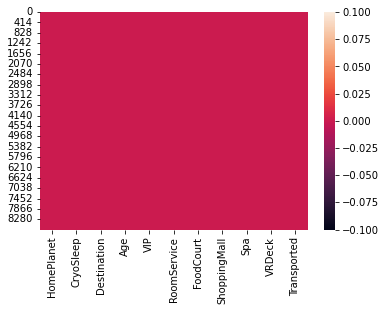

In [132]:
sns.heatmap(data.isnull())

In [133]:
data.head(10)

HomePlanet  CryoSleep    Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa      False    TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth      False    TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa      False    TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa      False    TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth      False    TRAPPIST-1e  16.0  False        303.0       70.0   
5      Earth      False  PSO J318.5-22  44.0  False          0.0      483.0   
6      Earth      False    TRAPPIST-1e  26.0  False         42.0     1539.0   
7      Earth       True    TRAPPIST-1e  28.0  False          0.0        0.0   
8      Earth      False    TRAPPIST-1e  35.0  False          0.0      785.0   
9     Europa       True    55 Cancri e  14.0  False          0.0        0.0   

   ShoppingMall     Spa      VRDeck  Transported  
0           0.0     0.0    0.000000        False  
1          25.0   549.0   44.000000         True  
2           0.0  6715.0   49.000000        False  
3         371.0  3329.0  193.000000        False  
4         151.0   565.0    2.000000         True  
5           0.0   291.0    0.000000         True  
6           3.0     0.0    0.000000         True  
7           0.0     0.0  304.854791         True  
8          17.0   216.0    0.000000         True  
9           0.0     0.0    0.000000         True

In [134]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [135]:
X

array([['Europa', False, 'TRAPPIST-1e', 39.0, False, 0.0, 0.0, 0.0, 0.0,
        0.0],
       ['Earth', False, 'TRAPPIST-1e', 24.0, False, 109.0, 9.0, 25.0,
        549.0, 44.0],
       ['Europa', False, 'TRAPPIST-1e', 58.0, True, 43.0, 3576.0, 0.0,
        6715.0, 49.0],
       ['Europa', False, 'TRAPPIST-1e', 33.0, False, 0.0, 1283.0, 371.0,
        3329.0, 193.0],
       ['Earth', False, 'TRAPPIST-1e', 16.0, False, 303.0, 70.0, 151.0,
        565.0, 2.0],
       ['Earth', False, 'PSO J318.5-22', 44.0, False, 0.0, 483.0, 0.0,
        291.0, 0.0],
       ['Earth', False, 'TRAPPIST-1e', 26.0, False, 42.0, 1539.0, 3.0,
        0.0, 0.0],
       ['Earth', True, 'TRAPPIST-1e', 28.0, False, 0.0, 0.0, 0.0, 0.0,
        304.8547912992357],
       ['Earth', False, 'TRAPPIST-1e', 35.0, False, 0.0, 785.0, 17.0,
        216.0, 0.0],
       ['Europa', True, '55 Cancri e', 14.0, False, 0.0, 0.0, 0.0, 0.0,
        0.0],
       ['Europa', True, 'TRAPPIST-1e', 34.0, False, 0.0, 0.0,
        173.72916

In [136]:
y

array([False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False,  True,  True,  True,
        True, False, False, False, False,  True, False, False,  True,
        True, False,  True, False, False, False,  True,  True,  True,
        True, False, False, False,  True,  True, False,  True,  True,
       False, False,  True, False, False, False, False,  True,  True,
        True, False, False, False,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True, False, False,
        True, False,  True,  True, False,  True,  True, False, False,
       False, False, False,  True, False, False,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True, False,
       False,  True, False, False, False,  True,  True, False,  True,
       False,  True,

In [137]:
np.set_printoptions(threshold=np.inf)

In [138]:
#Cryosleep VIP and y need to be label encoded
from sklearn.preprocessing import LabelEncoder
ley = LabelEncoder()
y = np.array(ley.fit_transform(y))
lex1 = LabelEncoder()
X[:,1] = np.array(lex1.fit_transform(X[:,1]))
lex2 = LabelEncoder()
X[:,4] = np.array(lex2.fit_transform(X[:,4]))
X

array([['Europa', 0, 'TRAPPIST-1e', 39.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0],
       ['Earth', 0, 'TRAPPIST-1e', 24.0, 0, 109.0, 9.0, 25.0, 549.0,
        44.0],
       ['Europa', 0, 'TRAPPIST-1e', 58.0, 1, 43.0, 3576.0, 0.0, 6715.0,
        49.0],
       ['Europa', 0, 'TRAPPIST-1e', 33.0, 0, 0.0, 1283.0, 371.0, 3329.0,
        193.0],
       ['Earth', 0, 'TRAPPIST-1e', 16.0, 0, 303.0, 70.0, 151.0, 565.0,
        2.0],
       ['Earth', 0, 'PSO J318.5-22', 44.0, 0, 0.0, 483.0, 0.0, 291.0,
        0.0],
       ['Earth', 0, 'TRAPPIST-1e', 26.0, 0, 42.0, 1539.0, 3.0, 0.0, 0.0],
       ['Earth', 1, 'TRAPPIST-1e', 28.0, 0, 0.0, 0.0, 0.0, 0.0,
        304.8547912992357],
       ['Earth', 0, 'TRAPPIST-1e', 35.0, 0, 0.0, 785.0, 17.0, 216.0, 0.0],
       ['Europa', 1, '55 Cancri e', 14.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0],
       ['Europa', 1, 'TRAPPIST-1e', 34.0, 0, 0.0, 0.0,
        173.72916912197996, 0.0, 0.0],
       ['Europa', 0, '55 Cancri e', 45.0, 0, 39.0, 7295.0, 589.0, 110.0,
        124.0],
     

In [139]:
# Remaining Two need to be one hot encoded
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0,2])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0, 39.0, 0, 0.0, 0.0, 0.0, 0.0,
        0.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0, 24.0, 0, 109.0, 9.0, 25.0,
        549.0, 44.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0, 58.0, 1, 43.0, 3576.0, 0.0,
        6715.0, 49.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0, 33.0, 0, 0.0, 1283.0, 371.0,
        3329.0, 193.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0, 16.0, 0, 303.0, 70.0, 151.0,
        565.0, 2.0],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 44.0, 0, 0.0, 483.0, 0.0, 291.0,
        0.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0, 26.0, 0, 42.0, 1539.0, 3.0, 0.0,
        0.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1, 28.0, 0, 0.0, 0.0, 0.0, 0.0,
        304.8547912992357],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0, 35.0, 0, 0.0, 785.0, 17.0,
        216.0, 0.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1, 14.0, 0, 0.0, 0.0, 0.0, 0.0,
        0.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1, 34.0, 0, 0.0, 0.0,
        173.72916912197996, 0.0, 0.0],
   

In [140]:
X.shape

(8693, 14)

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [142]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [143]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [144]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [145]:
ann.fit(X_train, y_train, batch_size=32, epochs=500)

Epoch 1/500
204/204 [==============================] - 1s 1ms/step - loss: 0.6791 - accuracy: 0.6141
Epoch 2/500
204/204 [==============================] - 0s 1ms/step - loss: 0.5573 - accuracy: 0.7382
Epoch 3/500
204/204 [==============================] - 0s 2ms/step - loss: 0.5054 - accuracy: 0.7573
Epoch 4/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4783 - accuracy: 0.7667
Epoch 5/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4623 - accuracy: 0.7785
Epoch 6/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4528 - accuracy: 0.7846
Epoch 7/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4470 - accuracy: 0.7874
Epoch 8/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4438 - accuracy: 0.7885
Epoch 9/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.7918
Epoch 10/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4392 - accura

204/204 [==============================] - 0s 1ms/step - loss: 0.4200 - accuracy: 0.8015
Epoch 161/500
204/204 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8023
Epoch 162/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4196 - accuracy: 0.8026
Epoch 163/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4202 - accuracy: 0.8037
Epoch 164/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4196 - accuracy: 0.8029
Epoch 165/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4204 - accuracy: 0.8041
Epoch 166/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4202 - accuracy: 0.8035
Epoch 167/500
204/204 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8055
Epoch 168/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4199 - accuracy: 0.8046
Epoch 169/500
204/204 [==============================] - 0s 2ms/step - loss: 0.4200 - a

204/204 [==============================] - 0s 1ms/step - loss: 0.4170 - accuracy: 0.8064
Epoch 319/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4169 - accuracy: 0.8053
Epoch 320/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.8053
Epoch 321/500
204/204 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8043
Epoch 322/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4170 - accuracy: 0.8070
Epoch 323/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4169 - accuracy: 0.8078
Epoch 324/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4171 - accuracy: 0.8053
Epoch 325/500
204/204 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8078
Epoch 326/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.8044
Epoch 327/500
204/204 [==============================] - 0s 2ms/step - loss: 0.4167 - a

204/204 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.8056
Epoch 477/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8060
Epoch 478/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4159 - accuracy: 0.8049
Epoch 479/500
204/204 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.8053
Epoch 480/500
204/204 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8046
Epoch 481/500
204/204 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8078
Epoch 482/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4151 - accuracy: 0.8076
Epoch 483/500
204/204 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.8052
Epoch 484/500
204/204 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.8063
Epoch 485/500
204/204 [==============================] - 0s 2ms/step - loss: 0.4153 - a

In [146]:
y_pred = ann.predict(X_test)
y_pred = y_pred > 0.5
y_pred

68/68 [==============================] - 0s 1ms/step


array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [147]:
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis = 1))

[[1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]

In [148]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[811 283]
 [177 903]]
0.7884084636614536


In [149]:
test_data = pd.read_csv('Data/test.csv')
test_data

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0013_01      Earth      True     G/3/S    TRAPPIST-1e  27.0  False   
1        0018_01      Earth     False     F/4/S    TRAPPIST-1e  19.0  False   
2        0019_01     Europa      True     C/0/S    55 Cancri e  31.0  False   
3        0021_01     Europa     False     C/1/S    TRAPPIST-1e  38.0  False   
4        0023_01      Earth     False     F/5/S    TRAPPIST-1e  20.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
4275     9273_01     Europa     False   D/297/P            NaN   NaN  False   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0             0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1             0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2             0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3             0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4            10.0        0.0         635.0     0.0     0.0   Brence Harperez  
...           ...        ...           ...     ...     ...               ...  
4272          0.0        0.0           0.0     0.0     0.0       Jeron Peter  
4273          0.0      847.0          17.0    10.0   144.0     Matty Scheron  
4274          0.0        0.0           0.0     0.0     0.0       Jayrin Pore  
4275          0.0     2680.0           0.0     0.0   523.0    Kitakan Conale  
4276          0.0        0.0           0.0     0.0     0.0  Lilace Leonzaley  

[4277 rows x 13 columns]

In [150]:
ids = test_data['PassengerId'].values
test_data = test_data.drop(['PassengerId','Cabin','Name'], axis=1)
test_data

HomePlanet CryoSleep    Destination   Age    VIP  RoomService  FoodCourt  \
0         Earth      True    TRAPPIST-1e  27.0  False          0.0        0.0   
1         Earth     False    TRAPPIST-1e  19.0  False          0.0        9.0   
2        Europa      True    55 Cancri e  31.0  False          0.0        0.0   
3        Europa     False    TRAPPIST-1e  38.0  False          0.0     6652.0   
4         Earth     False    TRAPPIST-1e  20.0  False         10.0        0.0   
...         ...       ...            ...   ...    ...          ...        ...   
4272      Earth      True    TRAPPIST-1e  34.0  False          0.0        0.0   
4273      Earth     False    TRAPPIST-1e  42.0  False          0.0      847.0   
4274       Mars      True    55 Cancri e   NaN  False          0.0        0.0   
4275     Europa     False            NaN   NaN  False          0.0     2680.0   
4276      Earth      True  PSO J318.5-22  43.0  False          0.0        0.0   

      ShoppingMall     Spa  VRDeck  
0              0.0     0.0     0.0  
1              0.0  2823.0     0.0  
2              0.0     0.0     0.0  
3              0.0   181.0   585.0  
4            635.0     0.0     0.0  
...            ...     ...     ...  
4272           0.0     0.0     0.0  
4273          17.0    10.0   144.0  
4274           0.0     0.0     0.0  
4275           0.0     0.0   523.0  
4276           0.0     0.0     0.0  

[4277 rows x 10 columns]

<AxesSubplot:>

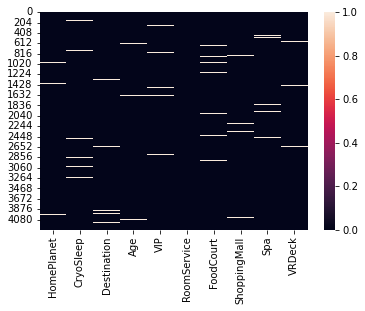

In [151]:
sns.heatmap(test_data.isnull())

In [152]:
test_data['VRDeck'].fillna(value=means['vr'], inplace=True)
test_data['Age'].fillna(value=means['age'], inplace=True)
test_data['RoomService'].fillna(value=means['rs'], inplace=True)
test_data['FoodCourt'].fillna(value=means['fc'], inplace=True)
test_data['ShoppingMall'].fillna(value=means['sm'], inplace=True)
test_data['Spa'].fillna(value=means['spa'], inplace=True)

In [153]:
test_data = test_data.fillna({'HomePlanet':'Earth', 'CryoSleep':False, 'Destination':'TRAPPIST-1e', 'VIP':False})

<AxesSubplot:>

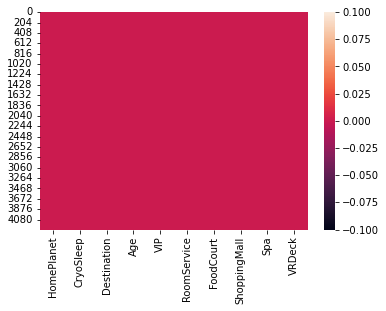

In [154]:
sns.heatmap(test_data.isnull())

In [155]:
X_t = test_data.values
X_t

array([['Earth', True, 'TRAPPIST-1e', 27.0, False, 0.0, 0.0, 0.0, 0.0,
        0.0],
       ['Earth', False, 'TRAPPIST-1e', 19.0, False, 0.0, 9.0, 0.0,
        2823.0, 0.0],
       ['Europa', True, '55 Cancri e', 31.0, False, 0.0, 0.0, 0.0, 0.0,
        0.0],
       ['Europa', False, 'TRAPPIST-1e', 38.0, False, 0.0, 6652.0, 0.0,
        181.0, 585.0],
       ['Earth', False, 'TRAPPIST-1e', 20.0, False, 10.0, 0.0, 635.0,
        0.0, 0.0],
       ['Earth', False, 'TRAPPIST-1e', 31.0, False, 0.0, 1615.0, 263.0,
        113.0, 60.0],
       ['Europa', True, '55 Cancri e', 21.0, False, 0.0,
        458.07720329024676, 0.0, 0.0, 0.0],
       ['Europa', True, 'TRAPPIST-1e', 20.0, False, 0.0, 0.0, 0.0, 0.0,
        0.0],
       ['Europa', True, '55 Cancri e', 23.0, False, 0.0, 0.0, 0.0, 0.0,
        0.0],
       ['Earth', False, '55 Cancri e', 24.0, False, 0.0, 639.0, 0.0, 0.0,
        0.0],
       ['Earth', False, 'TRAPPIST-1e', 19.0, False, 339.0, 3.0, 136.0,
        237.0, 0.0],
       ['E

In [156]:
X_t[:,1] = np.array(lex1.transform(X_t[:,1]))
X_t[:,4] = np.array(lex2.transform(X_t[:,4]))

In [157]:
X_t = np.array(ct.fit_transform(X_t))
X_t

array([[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1, 27.0, 0, 0.0, 0.0, 0.0, 0.0,
        0.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0, 19.0, 0, 0.0, 9.0, 0.0, 2823.0,
        0.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1, 31.0, 0, 0.0, 0.0, 0.0, 0.0,
        0.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0, 38.0, 0, 0.0, 6652.0, 0.0,
        181.0, 585.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0, 20.0, 0, 10.0, 0.0, 635.0, 0.0,
        0.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0, 31.0, 0, 0.0, 1615.0, 263.0,
        113.0, 60.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1, 21.0, 0, 0.0,
        458.07720329024676, 0.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1, 20.0, 0, 0.0, 0.0, 0.0, 0.0,
        0.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1, 23.0, 0, 0.0, 0.0, 0.0, 0.0,
        0.0],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0, 24.0, 0, 0.0, 639.0, 0.0, 0.0,
        0.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0, 19.0, 0, 339.0, 3.0, 136.0,
        237.0, 0.0],
       [0.0, 1.0, 0.0, 0.0, 0.0,

In [158]:
X_t = sc.transform(X_t)

In [159]:
X_t.shape

(4277, 14)

In [1]:
y_p = ann.predict(X_t)
y_p = y_p > 0.5
y_p = y_p.reshape(1, len(y_p))[0]
y_p

NameError: name 'ann' is not defined

In [168]:
submission = pd.DataFrame({'PassengerId':ids, "Transported":y_p})
submission

PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01         True
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]

In [169]:
submission.to_csv('ann.csv',index=False)

In [2]:
#let us also try out a boosting algorithm
import xgboost as xgb

/home/shivam/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
